## **House Price Prediction using XGBRegressor**

### **Import the library**

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
#from sklearn.metrics import mean_squared_error
from sklearn import metrics
from xgboost import XGBRegressor

### **Looking into the data**

In [45]:
#import the house price data
house_price_data = fetch_california_housing()
print(house_price_data.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


In [46]:
print(house_price_data)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [47]:
#describe the dataset
print(house_price_data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

### **Load the data to a Pandas DataFrame**

In [48]:
#Load the dataset to a Pandas DataFrame

house_price_df = pd.DataFrame(house_price_data.data, columns=house_price_data.feature_names)

In [49]:
house_price_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [50]:
house_price_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [51]:
house_price_df.shape

(20640, 8)

### **Get the Target Column**

In [52]:
#Target Column to the DataFrame
house_price_df['price'] = house_price_data.target

In [53]:
house_price_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [54]:
#Check the number of rows and Column in the dataFrame
house_price_df.shape

(20640, 9)

### **Preprocess the DataFrame**

In [55]:
#Check the missing value
house_price_df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
price,0


In [56]:
#Statistical Measure of the dataframe

house_price_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


### **Understanding the correlation between various features in the dataset**

**1. Positive Correlation**

✅ **Definisi**: Ketika dua variabel meningkat atau menurun bersama-sama. Jika satu variabel naik, variabel lainnya juga naik, dan sebaliknya.

✅ **Contoh Sederhana**:

- Pendapatan & Pengeluaran: Semakin tinggi pendapatan seseorang, semakin besar pula pengeluarannya.
- Tinggi Badan & Berat Badan: Biasanya, semakin tinggi seseorang, semakin berat badannya.
- Jumlah Belajar & Nilai Ujian: Semakin lama seseorang belajar, semakin tinggi nilainya (dalam kebanyakan kasus).

✅ **Grafik Positive Correlation**:

📈 Garis naik ke kanan (miring ke atas)
Jika digambarkan dalam grafik scatter plot, titik-titik data cenderung membentuk pola naik ke kanan.



---


**2. Negative Correlation**

🚫 **Definisi**: Ketika satu variabel meningkat, variabel lainnya justru menurun.

🚫 **Contoh Sederhana**:

- Harga & Permintaan: Semakin tinggi harga suatu barang, semakin rendah permintaan konsumen.
- Kecepatan Kendaraan & Waktu Tempuh: Semakin cepat kendaraan bergerak, semakin sedikit waktu yang diperlukan untuk sampai ke tujuan.
- Usia Mobil & Nilai Jual: Semakin tua mobil, semakin rendah nilai jualnya.

🚫 **Grafik Negative Correlation**:

📉 Garis turun ke kanan (miring ke bawah)
Jika digambarkan dalam scatter plot, titik-titik data membentuk pola yang turun ke kanan.



In [57]:
correlation = house_price_df.corr()

In [58]:
print(correlation)

              MedInc  HouseAge  AveRooms  AveBedrms  ...  AveOccup  Latitude  Longitude     price
MedInc      1.000000 -0.119034  0.326895  -0.062040  ...  0.018766 -0.079809  -0.015176  0.688075
HouseAge   -0.119034  1.000000 -0.153277  -0.077747  ...  0.013191  0.011173  -0.108197  0.105623
AveRooms    0.326895 -0.153277  1.000000   0.847621  ... -0.004852  0.106389  -0.027540  0.151948
AveBedrms  -0.062040 -0.077747  0.847621   1.000000  ... -0.006181  0.069721   0.013344 -0.046701
Population  0.004834 -0.296244 -0.072213  -0.066197  ...  0.069863 -0.108785   0.099773 -0.024650
AveOccup    0.018766  0.013191 -0.004852  -0.006181  ...  1.000000  0.002366   0.002476 -0.023737
Latitude   -0.079809  0.011173  0.106389   0.069721  ...  0.002366  1.000000  -0.924664 -0.144160
Longitude  -0.015176 -0.108197 -0.027540   0.013344  ...  0.002476 -0.924664   1.000000 -0.045967
price       0.688075  0.105623  0.151948  -0.046701  ... -0.023737 -0.144160  -0.045967  1.000000

[9 rows x 9 columns

<Axes: >

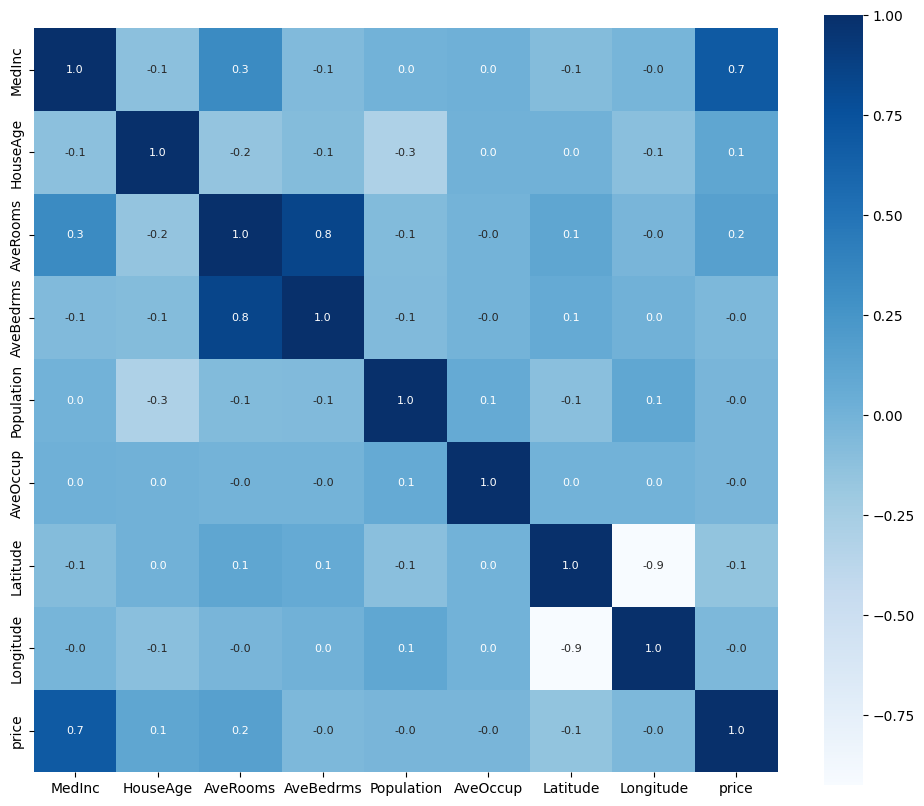

In [59]:
#plot the correlation with a heatmap

plt.figure(figsize=(12,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')


In [60]:
### **Splitting the data and target**
X = house_price_df.drop(['price'], axis=1)
Y = house_price_df['price']

In [61]:
print(X)
print(Y)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  Longitude
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88    -122.23
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86    -122.22
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85    -122.24
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85    -122.25
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85    -122.25
...       ...       ...       ...        ...         ...       ...       ...        ...
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48    -121.09
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49    -121.21
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43    -121.22
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43    -121.32
20639  2.3886      16.0  5.25471

In [62]:
#Splitting the data into Training data and Test data

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [63]:
print(X.shape, Y.shape)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(20640, 8) (20640,)
(16512, 8) (16512,)
(4128, 8) (4128,)


### **Train the Model**

In [64]:
#Model training

model = XGBRegressor()

#training the model with X_train
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

### **Model Evaluation**

Prediction on Training data

In [65]:
#Accuracy for prediction on training data
training_data_prediction = model.predict(X_train)

In [66]:
print(training_data_prediction)

[0.5523039 3.0850039 0.5835302 ... 1.9204227 1.952873  0.6768683]


In [74]:
# r squared error
error_score_r = metrics.r2_score(Y_train, training_data_prediction)
print("R squared error : ", error_score_r)

# mean squared error
error_score_mse = metrics.mean_squared_error(Y_train, training_data_prediction)
print("MSE squared error : ", error_score_mse)

#mean absolute error
error_score_mae = metrics.mean_absolute_error(Y_train, training_data_prediction)
print("MAE squared error : ", error_score_mae)

R squared error :  0.943650140819218
MSE squared error :  0.0748112971690747
MAE squared error :  0.1933648700612105


Visualizing the actual Prices and predicted prices

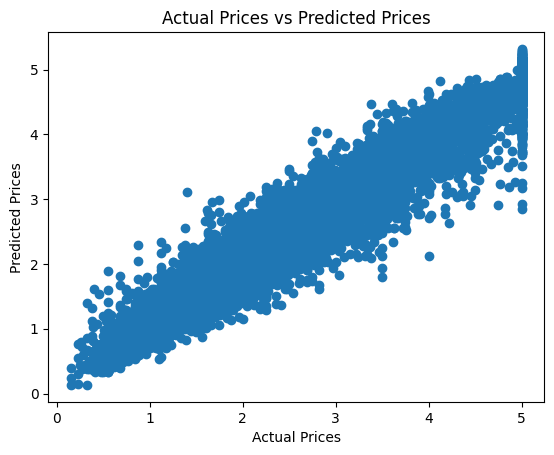

In [78]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

Prediction on Test Data

In [75]:
test_data_prediction = model.predict(X_test)

In [77]:
# r squared error
error_score_r_test = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error for test data: ", error_score_r_test)

# mean squared error
error_score_mse_test = metrics.mean_squared_error(Y_test, test_data_prediction)
print("MSE squared error for test data: ", error_score_mse_test)

#mean absolute error
error_score_mae_test = metrics.mean_absolute_error(Y_test, test_data_prediction)
print("MAE squared error for test data: ", error_score_mae_test)

R squared error for test data:  0.8338000331788725
MSE squared error for test data:  0.22387540906811954
MAE squared error for test data:  0.3108631800268186


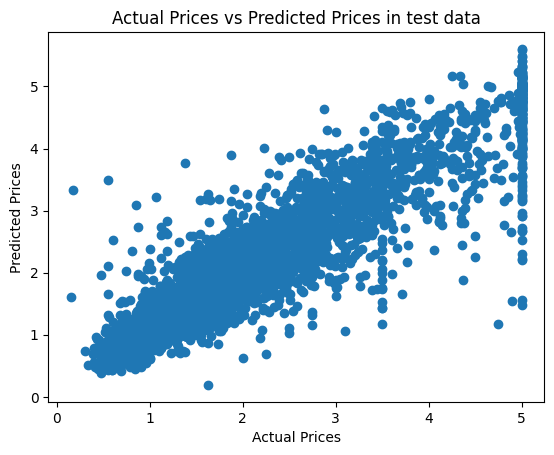

In [80]:
#Visualizing
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices in test data")
plt.show()